In [11]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
from scipy import integrate, linalg

La ecuacion diferencial del oscilador amortiguado es

$$\frac{d^2x}{dt^2}+2\zeta w_n\frac{dx}{dt}+w_n^2x=\frac{1}{m}F_0 sin(wt)$$
Donde

$$w_n=\sqrt{\frac{k}{m}}$$
frecuencia angular natural del oscilador de masa m y constante k

$$\zeta=\frac{c}{2\sqrt{mk}}$$
a su vez $c=$ Coeficiente de viscosidad

El lado derecho de la ecuacion diferencial es un termino de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $w(w\neq w_n)$

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:

*Movimiento sobreamortiguado ($\zeta \gt
1$). El sistema decae exponencialmente al estado estacionario sin oscilar.

*Críticamente amortiguado ($\zeta = 1$).

*Movimiento subamortiguado ($\zeta \lt  1$). Movimiento periódico que decae exponencialmente.

*Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.

Problema 1
Resuelva numerica primero el caso de un oscilador amortiguado caso sin forzamiento

$$\zeta \neq 0$$$$F_0=0$$$$m=1$$$$k=9$$
Condiciones iniciales$$x(0)\lt0$$$$x'(0)=0$$

$$\frac{d^2x}{dt^2}+2\zeta w_n\frac{dx}{dt}+w_n^2x=\frac{1}{m}F_0 sin(wt)$$como dos ecuaciones de primer grado

$$\frac{dx}{dt}=x_1$$$$\frac{dx_1}{dt}=\frac{1}{m}F_0 sin(wt)-2\zeta w_n x_1 -w_n^2x$$
En orden sería$$\begin{matrix}
\frac{dx}{dt}=&amp; &amp;x_1&amp; \\
\frac{dx_1}{dt}=&amp;-w_n^2 \ x&amp;-2\zeta w_n \ x_1 &amp;+\frac{1}{m}F_0 sin(wt)
\end{matrix}$$

El sistema queda de la siguiente manera$$\vec{x}=\begin{bmatrix}x \\ x_1 \end{bmatrix}$$$$
\frac{\vec{x}}{dt}=\frac{d}{dt}
\begin{bmatrix}
x \\
x_1 
\end{bmatrix}=
\begin{bmatrix}
0 &amp; 1 \\
-w_n^2 &amp; -2\zeta w_n 
\end{bmatrix}
\begin{bmatrix}
x \\
x_1 
\end{bmatrix}
+\begin{bmatrix}
0 \\
\frac{1}{m}F_0sin(wt) 
\end{bmatrix}
$$

Este es un sistema no homogeneo

In [12]:
def dxdt (X,t=0):
  return np.array([0*X[0]+1*X[1],
                   -1*wn**2*X[0]-2*zeta*wn*X[1]+(1/m)*f0*np.sin(w*t) ])

<Figure size 432x288 with 0 Axes>

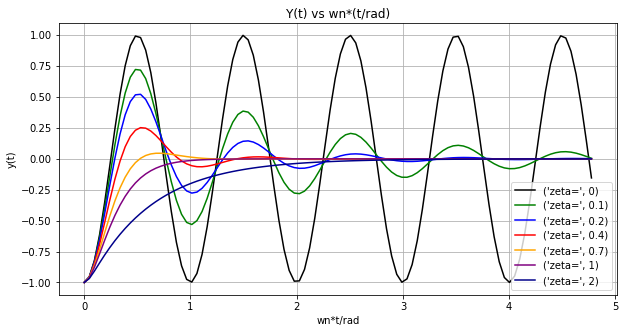

'Integration successful.'

In [23]:
#Para resolver el problema 1 utilizamos 
f0=0
m=1
k=9
#zeta puede ser cualquier valor
#w puede valer lo que sea no importa ya que f0 es 0
w=1
wn=np.sqrt(k/m)


#Condiciones iniciales
#Es de la forma
y0=np.array([-1,0])
t=np.linspace(0,10,100)

fig = plt.figure()
plt.figure(figsize=(10,5))
col=['k','green','b','r','orange','purple','darkblue']
for zeta,col in zip([0,0.1,0.2,0.4,0.7,1,2],col):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T
  ejx=(wn*t)/(2*np.pi)
  label='zeta=',zeta
  plt.plot(ejx,y,label=label,color=col)
  
plt.xlabel('wn*t/rad')
plt.legend(loc='best');
plt.ylabel('y(t)')
plt.grid();
plt.title('Y(t) vs wn*(t/rad)')
plt.show();
infodict['message']

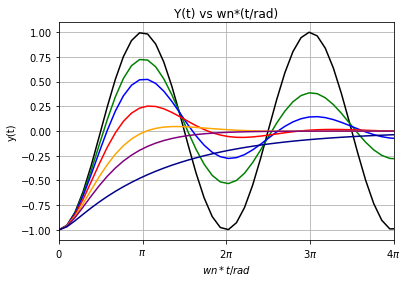

'Integration successful.'

In [21]:
col=['k','green','b','r','orange','purple','darkblue']
for zeta,col in zip([0,0.1,0.2,0.4,0.7,1,2],col):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T
  ejx=(wn*t)/(2*np.pi)
  label='zeta=',zeta
  plt.plot(ejx,y,label=label,color=col)
  
plt.xlabel('$wn*t/rad$')
plt.xticks([0,0.5,1,1.5,2],[r'$0$',r'$\pi$',r'$2\pi$',r'$3\pi$',r'$4\pi$',])

plt.ylabel('y(t)')
plt.grid();
plt.title('Y(t) vs wn*(t/rad)')
plt.xlim(0,2)
plt.show();
infodict['message']

Tiene esta forma para valores negativos como dice la isntruccion sin embargo, no pasa por las mismas y ya que el tiempo esta expresado de forma distinta como vemos en el eje x.

**Problema 2** \\
Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$*texto en cursiva*

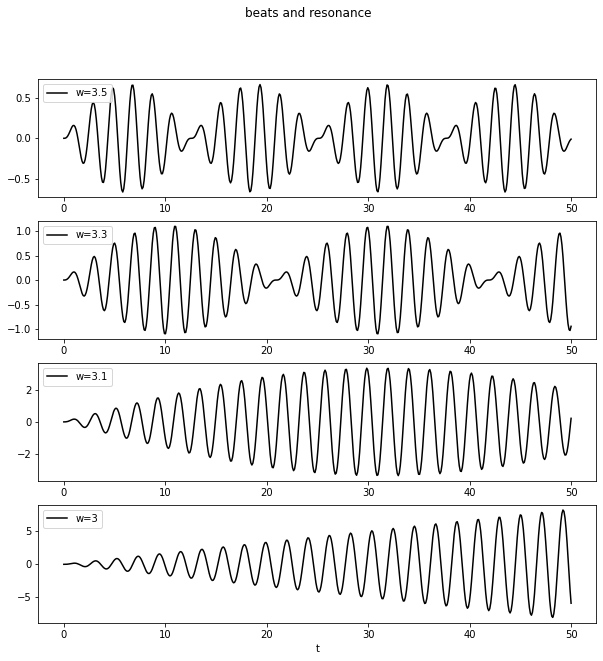

'Integration successful.'

In [5]:
#Para resolver el problema 2 utilizamos=
zeta=0
f0=1
m=1
k=9
wn=np.sqrt(k/m)
#w va a variar

#Condiciones iniciales

y0=np.array([0,0])
t=np.linspace(0,50,500)

fig, axs=plt.subplots(4,sharex=False)
fig.set_size_inches(10,10)

for w,i in zip([3.5,3.3,3.1,3],[0,1,2,3]):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T
  
  axs[i].plot(t,y,color='k',label='w='+str(w))
  axs[i].legend(loc='upper left')
  

plt.xlabel('t')
fig.suptitle('beats and resonance')
plt.show();
infodict['message']

**Problema 3** \\
\
Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

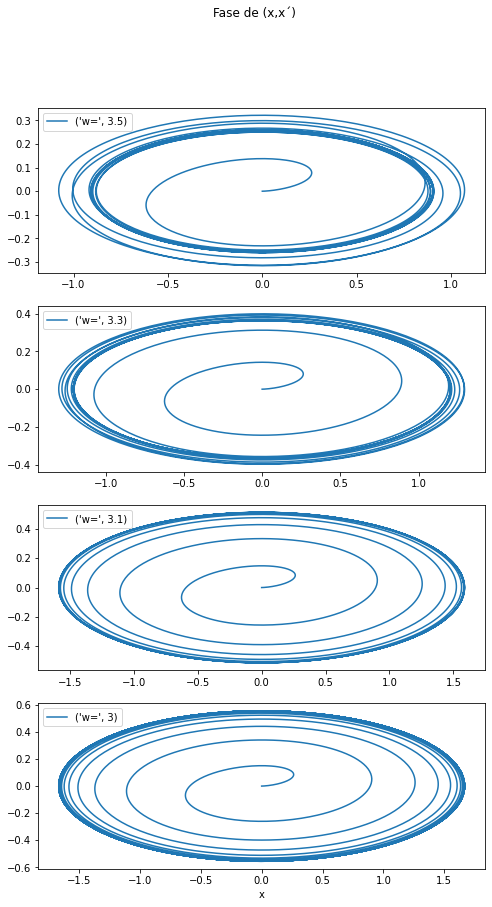

'Integration successful.'

In [17]:
#Para resolver el problema 3 utilizamos=
zeta=0.1
f0=1
m=1
k=9
wn=np.sqrt(k/m)

#Condiciones iniciales

y0=np.array([0,0])
t=np.linspace(0,50,5000)

fig, axs=plt.subplots(4,sharex=False)
fig.set_size_inches(8,14)

for w,i in zip([3.5,3.3,3.1,3],[0,1,2,3]):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T 
  label='w=',w
  axs[i].plot(x,y,label=label)
  axs[i].legend(loc='upper left')
  

plt.xlabel('x')
fig.suptitle('Fase de (x,x´)')
plt.show();
infodict['message']